# Mandelbrot

## Scaling

In [1]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
colours = []
colours.append( (26, 188, 156))
colours.append( (52, 152, 219))
colours.append( (155, 89, 182))
colours.append( (241, 196, 15))

In [3]:
color=[]
for k in xrange(len(colours)):
        col = [ float(c) / 255.0 for c in colours[k]]
        color.append(col)

In [4]:
with open('Dynamic.txt') as f:
    dynamic_scale = f.read().splitlines()

In [5]:
with open('Static.txt') as f:
    static_scale = f.read().splitlines()

In [6]:
with open('Guided.txt') as f:
    guided_scale = f.read().splitlines()

In [7]:
with open("No_Scheduling.txt") as f:
    no_scheduling = f.read().splitlines()

In [8]:
dynamic_scale = map(float, dynamic_scale)
static_scale = map(float, static_scale)
guided_scale = map(float, guided_scale)
no_scheduling = map(float,no_scheduling)

In [9]:
T1 = 1.380507
T2 = 1.379373
T3 = 1.411663
T4 = 1.440358

In [10]:
sp_dynamic = []
for item in dynamic_scale:
    res= T1/item
    sp_dynamic.append(res)
    
sp_static = []
for item in static_scale:
    res = T2/item
    sp_static.append(res)
    
sp_guided = []
for item in guided_scale:
    res = T3/item
    sp_guided.append(res)
    
sp_noschedule = []
for item in no_scheduling:
    res = T4/item
    sp_noschedule.append(res)

In [11]:
num_threads=[]
for i in xrange(1,21):
    num_threads.append(i)

In [12]:
ideal_x = [0,20]
ideal_y =[0,20]

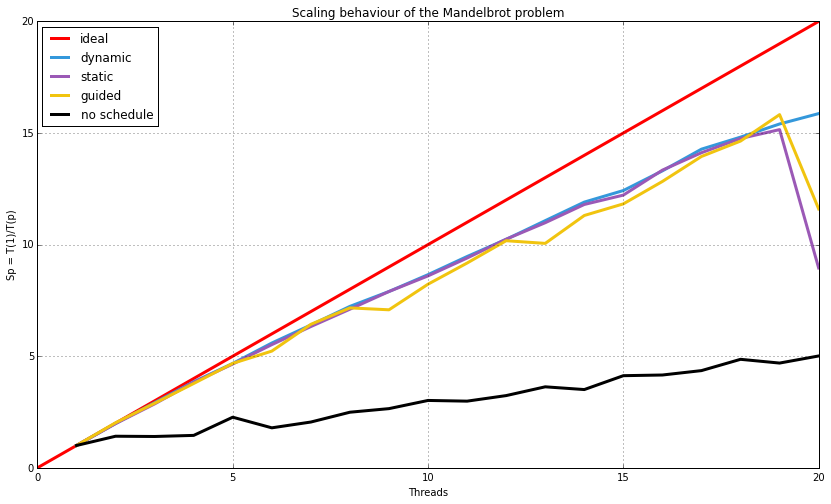

In [25]:
plt.rcParams['figure.figsize'] = (14.0, 8.0)
plt.title('Scaling behaviour of the Mandelbrot problem')
plt.xlabel('Threads ')
plt.ylabel('Sp = T(1)/T(p)')
p1, = plt.plot (ideal_x , ideal_y, color='red', linewidth=3, label="ideal") 
p2, = plt.plot( num_threads, sp_dynamic, color = color[1], linewidth = 3, label='dynamic')
p3, = plt.plot( num_threads, sp_static, color = color[2], linewidth = 3, label='static')
p4, = plt.plot( num_threads, sp_guided, color = color[3], linewidth = 3, label='guided')
p5, = plt.plot( num_threads, sp_noschedule, color = 'black', linewidth=3, label='no schedule')
legend([p1,p2, p3, p4, p5], ["ideal","dynamic", "static", "guided","no schedule"])
lgd = legend(loc=9, bbox_to_anchor=(0.08,1))
plt.plot(loc='best', numpoints=1)

plt.grid(True)
savefig('Mandelbrot_scaling.png')

## Chunk size

In [26]:
with open('ChunkDynamic.txt') as f:
    dynamic_chunk = f.read().splitlines()

In [27]:
with open('ChunkStatic.txt') as f:
    static_chunk = f.read().splitlines()

In [28]:
with open('ChunkGuided.txt') as f:
    guided_chunk = f.read().splitlines()

In [29]:
dynamic_chunk = map(float, dynamic_chunk)
static_chunk = map(float, static_chunk)
guided_chunk = map(float, guided_chunk)

In [30]:
num_chunks=[]
for i in xrange(1,101):
    num_chunks.append(i)

* == CPUTYPE: XeonE5-2680
* == NPROCS: 8
* == PBS_NP: 8
* == PBS_NODENUM: 0
* == PBS_NUM_NODES: 1
* == PBS_NUM_PPN: 8
== PBS_TASKNUM: 1

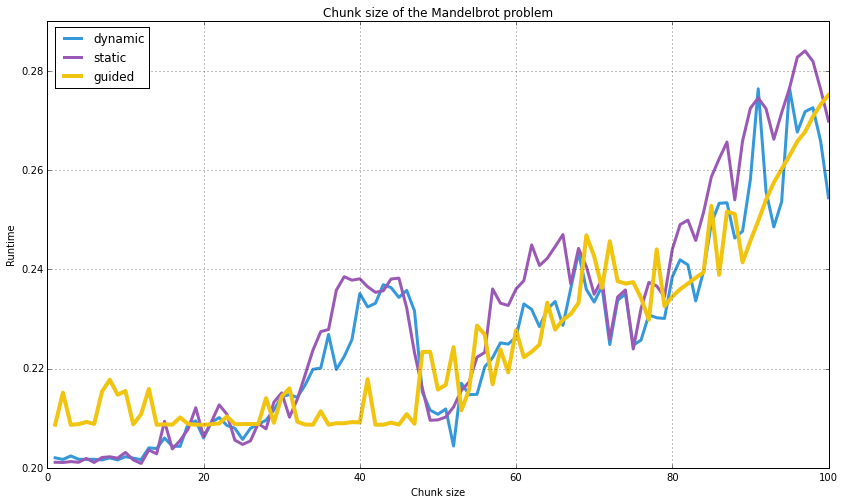

In [35]:
plt.rcParams['figure.figsize'] = (14.0, 8.0)
plt.title('Chunk size of the Mandelbrot problem')
plt.xlabel('Chunk size')
plt.ylabel('Runtime')
p2, = plt.plot( num_chunks, dynamic_chunk, color = color[1], linewidth = 3, label='dynamic')
p3, = plt.plot( num_chunks, static_chunk, color = color[2], linewidth = 3, label='static')
p4, = plt.plot( num_chunks, guided_chunk, color = color[3], linewidth = 4, label='guided')
legend([p2, p3, p4], ["dynamic", "static", "guided"])
lgd = legend(loc=9, bbox_to_anchor=(0.07,1))
plt.plot(loc='best', numpoints=1)

plt.grid(True)
savefig('Mandelbrot_chunksize.png')